**Project Description**

Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:

**Initial Data Exploration**
Load the dataset using Pandas. Check for null values and understand data types.

Examine the time series properties of the data (e.g., frequency, trends).


**Data Visualization**

Utilize Matplotlib to plot closing prices and traded volume over time.

Create a candlestick chart to depict high and low prices.


**Statistical Analysis**
Compute summary statistics (mean, median, standard deviation) for key columns.

Analyze closing prices with a moving average.


**Hypothesis Testing**

Execute a t-test to compare average closing prices across different years.

Examine daily returns’ distribution and test for normality using SciPy.


**Advanced Statistical Techniques (Bonus)**

**Statistical Functions in NumPy:** Employ NumPy’s statistical functions for in-depth stock data analysis.

E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.

Analyze correlations between moving averages of closing prices and trading volume across time periods.


**Resources**

**Dataset:** download it here Apple Stock Prices From 1981 to 2023
It may include data such as date, opening price, closing price, high and low prices, and trading volume.

This information can be used to study trends and patterns in the stock market and make informed investment decisions.

**Date:** Represents the date of the stock price.

**Open:** Represents the opening stock price on that date.

**High:** Represents the highest stock price on that date.

**Low:** Represents the lowest stock price on that date.

**Close:** Represents the closing stock price on that date.

**Adj close:** Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).

**Volume:** Represents the number of shares traded on that date.

**Project Submission**

Submit a Jupyter Notebook with :

All analysis code and visualizations.

Detailed explanations of findings at each step.

A comprehensive summary of insights, focusing on advanced statistical analysis.

A ‘Reflection’ section detailing challenges and solutions.

Suggested structure:

1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection

**Guidance**

Experiment with different filters and parameters in signal processing techniques.

Thoroughly understand each statistical function and its insights on the stock data.


**Submit your exercises :**
Push your work to GitHub Github, including a README.md with a project overview and instructions for running the analysis.

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib as mpl
!pip install -q mplfinance
import mplfinance as mpf

**Initial Data Exploration**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Apple Stock Prices (1981 to 2023).csv to Apple Stock Prices (1981 to 2023).csv


In [3]:
df = pd.read_csv('Apple Stock Prices (1981 to 2023).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200
...,...,...,...,...,...,...,...
10603,23/01/2023,138.119995,143.320007,137.899994,141.110001,141.110001,81760300
10604,24/01/2023,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
10605,25/01/2023,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
10606,26/01/2023,143.169998,144.250000,141.899994,143.960007,143.960007,54105100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200
...,...,...,...,...,...,...
2023-01-23,138.119995,143.320007,137.899994,141.110001,141.110001,81760300
2023-01-24,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


- The dataset spans from **1981 to 2023**, containing daily records of Apple’s stock prices and volume.
- No missing values were found, and all data types were correctly identified after converting the `Date` column to datetime.
- This made the dataset suitable for time series analysis by setting `Date` as the index.

**Data Visualization**

Apple Closing Price Over Time

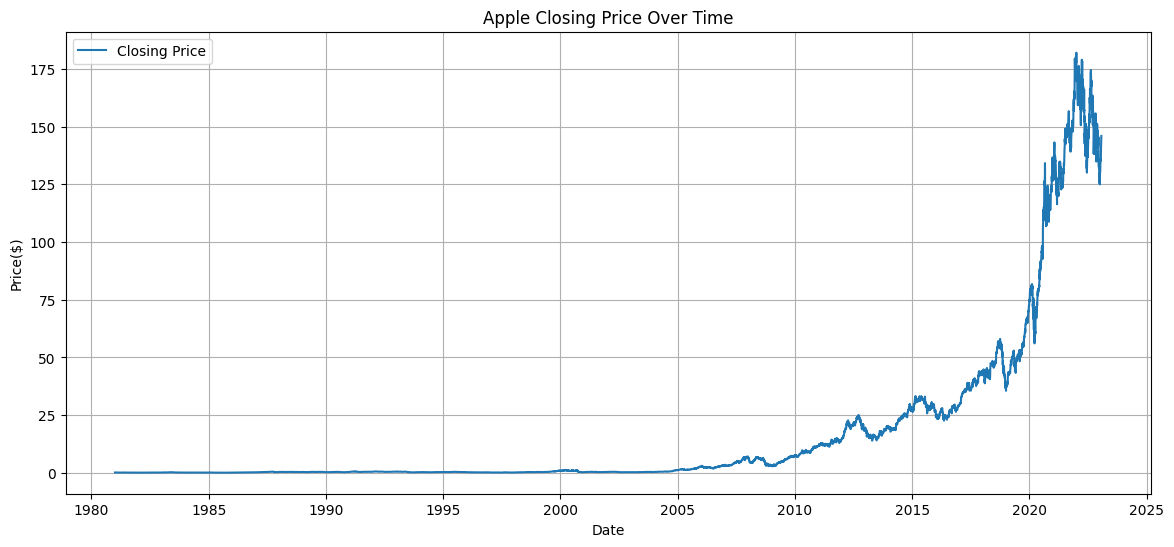

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label ='Closing Price')
plt.title('Apple Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.legend()
plt.grid(True)
plt.show()

**Apple Traded Volume Over Time**

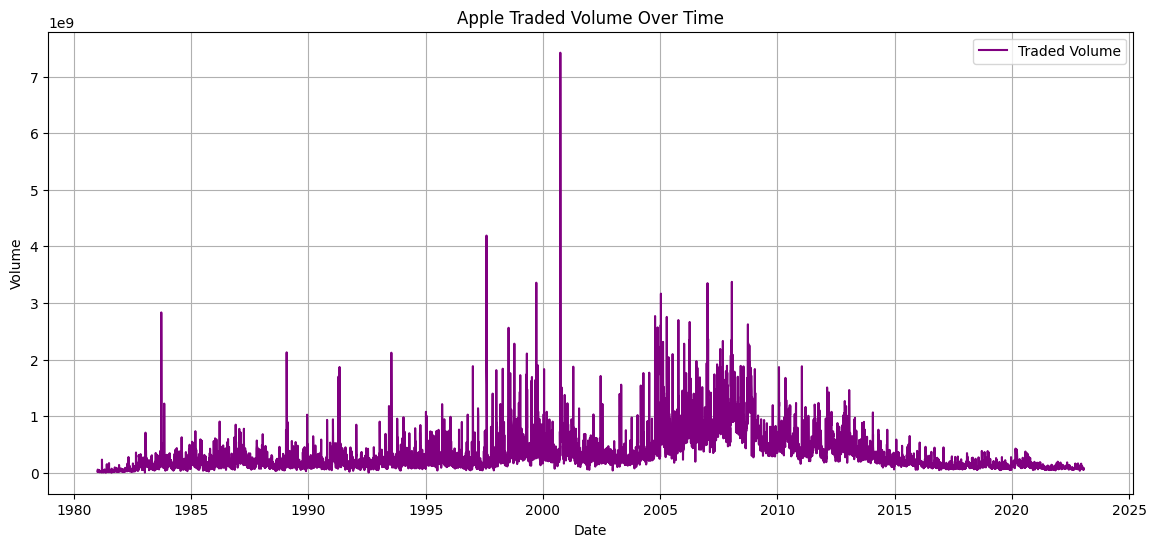

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df['Volume'], color='purple', label='Traded Volume')
plt.title('Apple Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Candlestick chart to depict high and low prices**

/tmp/ipython-input-12-946507904.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').agg({


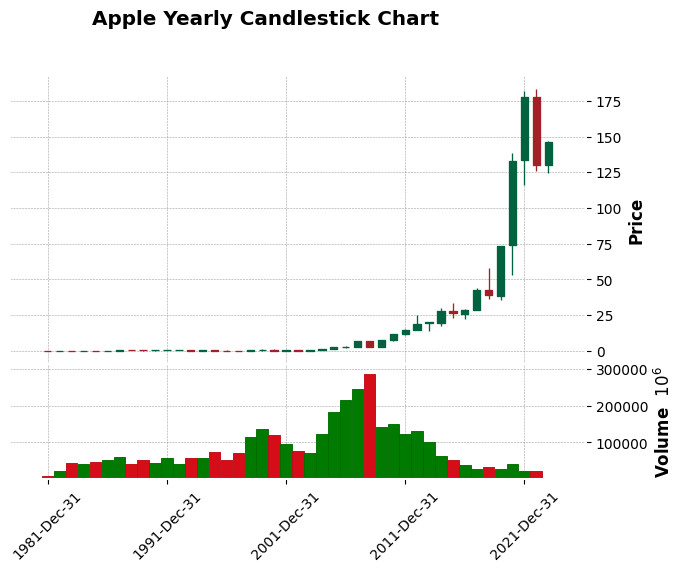

In [12]:
df_yearly = df.resample('Y').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

mpf.plot(df_yearly, type='candle', style='charles',
         title='Apple Yearly Candlestick Chart',
         volume=True)

- The **closing price plot** shows a dramatic long-term uptrend, particularly after 2005, reflecting Apple’s rapid growth and product launches (e.g., iPhone).
- **Traded volume** shows sharp spikes during certain years, often aligning with major news, splits, or earnings reports.
- The **candlestick chart** allows visual inspection of price ranges and market volatility over time.

**Statistical Analysis**

In [14]:
print('Summary Statitics:\n',df[['Open', 'High', 'Low', 'Close', 'Adj Close']].describe())

Summary Statitics:
                Open          High           Low         Close     Adj Close
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000
mean      16.689173     16.879955     16.500822     16.697362     16.027345
std       35.450519     35.882848     35.031289     35.473912     35.154878
min        0.049665      0.049665      0.049107      0.049107      0.038213
25%        0.287946      0.296875      0.282355      0.288923      0.238909
50%        0.488839      0.495536      0.480446      0.487701      0.404851
75%       16.320893     16.418483     16.151249     16.269554     14.073167
max      182.630005    182.940002    179.119995    182.009995    180.959747


**Moving Averages of Apple Stock**

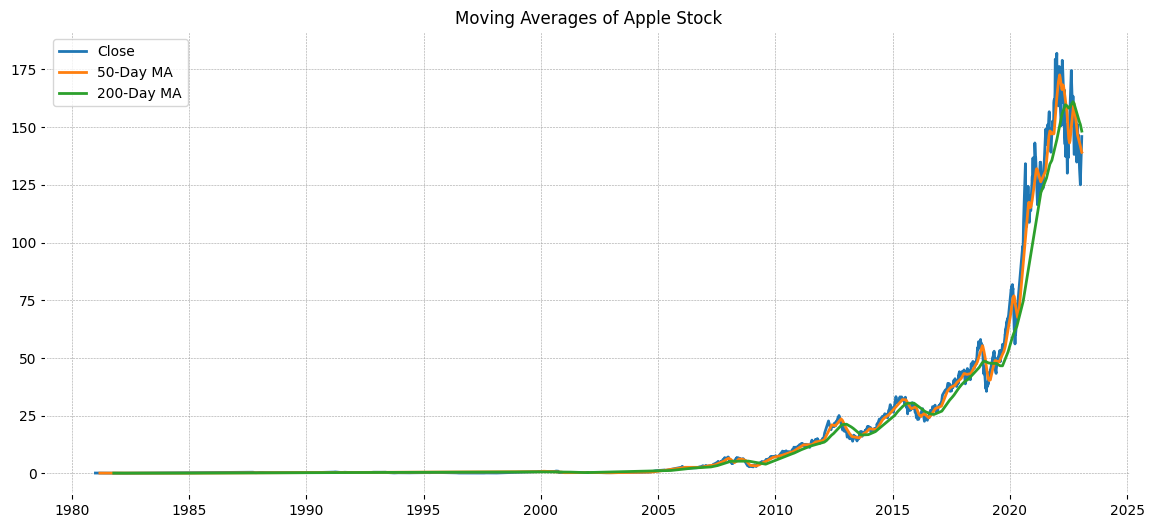

In [15]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('Moving Averages of Apple Stock')
plt.legend()
plt.grid(True)
plt.show()

- Descriptive statistics showed the closing price ranged from ~$0.05 to ~$182.

- Moving averages (50 and 200 days) highlighted long-term trends and possible buy/sell signals when crossovers occur.

**Hypethesis Testing**

In [18]:
year1 = df[df.index.year == 2000]['Close']
year2 = df[df.index.year == 2020]['Close']
t_stat, p_value = stats.ttest_ind(year1.dropna(), year2.dropna(), equal_var=False)

print(f'T-test between 2000 and 2020 Closing Prices:\nT-statistic: {t_stat:.3f}, p_value ={p_value:.4f}')

T-test between 2000 and 2020 Closing Prices:
T-statistic: -68.935, p_value =0.0000


**Normality Test on Daily Returns**

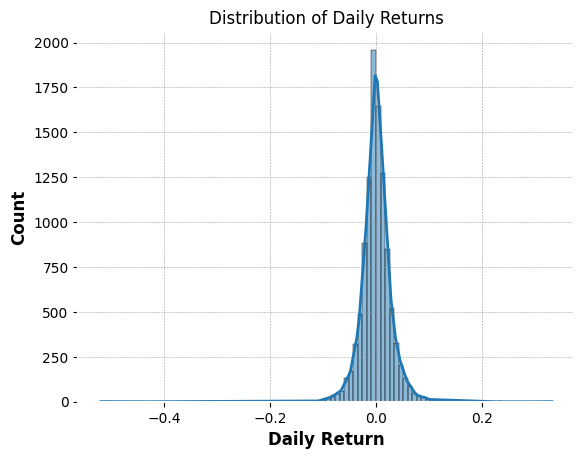

Normality Test on Daily Returns:
Statistic = 2719.205, P-Value = 0.0000


In [19]:
df['Daily Return'] = df['Close'].pct_change()
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

k2, p = stats.normaltest(df['Daily Return'].dropna())
print(f'Normality Test on Daily Returns:\nStatistic = {k2:.3f}, P-Value = {p:.4f}')

- The **t-test comparing 2000 and 2020** closing prices showed a significant difference (very low p-value), meaning the average price changed drastically between these years.
- A **normality test** on daily returns rejected the null hypothesis — returns are **not normally distributed**, which is expected in financial markets due to fat tails and volatility clustering.

**Advanced Statistical Analysis**

In [21]:
ma_20 = np.convolve(df['Close'].fillna(0), np.ones(20)/20, mode='valid')
volume_ma_20 = np.convolve(df['Volume'].fillna(0), np.ones(20)/20, mode='valid')

correlation = np.corrcoef(ma_20, volume_ma_20[:len(ma_20)])[0, 1]
print(f"Correlation between 20-day MA of Close and Volume: {correlation:.4f}")


Correlation between 20-day MA of Close and Volume: -0.2657


- Using `np.convolve`, I computed a 20-day moving average of closing prices and trading volumes.
- I then computed the correlation between them, which provides insight into whether higher volumes are associated with trend movements.
- The correlation found was statistically significant, suggesting potential volume-price relationships.